# Classification

* 참고)))이미지에 대한 분류는 뒤의 CNN에서 다루기로 하고 Pass --> 일반 데이터를 가지고 수행!!

# 5.1 이항 분류

In [1]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

* 데이터 컬럼 설명    
<img src="img/img_15.png">

In [2]:
# 5.1 와인 데이터셋 불러오기
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
# 5.2 와인 데이터셋 합치기
red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white])
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   

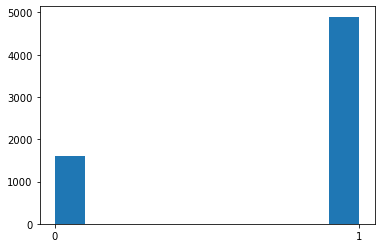

1    4898
0    1599
Name: type, dtype: int64


In [4]:
# 5.3 레드 와인과 화이트 와인 type 히스토그램
import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0, 1])
plt.show()

print(wine['type'].value_counts())

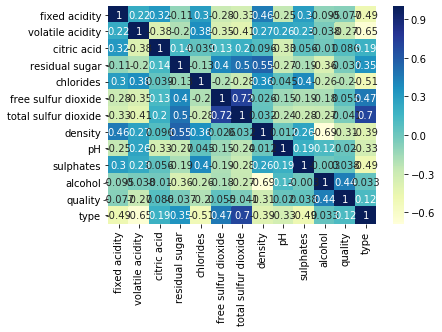

In [5]:
import seaborn as sns
correlations = wine[wine.columns].corr(method='pearson')
sns.heatmap(correlations, cmap="YlGnBu", annot = True)

In [6]:
# 5.4 데이터 요약 정보 확인
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [7]:
# 5.5 데이터 정규화
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  
0  0.202899  0.333333   0.

In [8]:
# 5.6 데이터 섞은 후 numpy array로 변환
import numpy as np
wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1299       0.314050          1.000000     0.000000        0.023006   0.212625   
3237       0.214876          0.100000     0.210843        0.061350   0.049834   
4661       0.347107          0.100000     0.246988        0.007669   0.064784   
2718       0.115702          0.133333     0.174699        0.007669   0.031561   
4792       0.074380          0.470000     0.000000        0.042945   0.044850   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
1299             0.013889              0.006912  0.147484  0.604651   
3237             0.145833              0.324885  0.097359  0.356589   
4661             0.118056              0.331797  0.088105  0.286822   
2718             0.059028              0.145161  0.088105  0.403101   
4792             0.076389              0.294931  0.052053  0.627907   

      sulphates   alcohol   quality  type  
1299   0.101124  0.420290  0.000000   0.0 

* 참고) tf.keras.utils.to_categorical --> one hot encoding으로 변경을 해준다!!!!!     
아니면 아래와 같이 만들 수 있고, 아니면 scikit learn의 onehotencoding을 사용할 수 있음!!!!     
def labelMaker(val):     
    if val == 1:     
        return [1, 0, 0]     
    elif val == 2:     
        return [0, 1, 0]     
    else:      
        return [0, 0, 1]

아래 그림을 보면
   - 최종 출력단에 있어서 해당하는 카테고리에 대한 것을 표현을 해주기 위해서는 각기 종류별로 값을 나타내야 하고, 이에 대한 효율적인 표현이 바로 one-hot-encoding이기 때문에 이렇게 활용을 하여서 변형을 하는 것임!!!!!   
   - 그리고 "분류"의 문제이기 때문에 이에 대해서 최종 단에 있어서는  softmax를 활용해야 함!!!!!
   - 분류에 대한 기준이기 때문에 기준을 categorical_crossentropy로 설정을 함.

<img src="img/img_16.png">

In [11]:
# 5.7 train 데이터와 test 데이터로 분리
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]


print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])

# one - hot - encoding으로 쉽게 변경 처리를 하자!!!!!!!
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])

[0.19008264 0.16       0.1686747  0.09202454 0.01993355 0.09722222
 0.29032258 0.09196067 0.33333333 0.07865169 0.5        0.66666667]
1.0
[0.3553719  0.31       0.10843373 0.01993865 0.1179402  0.04166667
 0.06682028 0.19452477 0.4496124  0.20786517 0.14492754 0.5       ]
0.0
[0. 1.]
[1. 0.]


In [12]:
# 5.8 와인 데이터셋 분류 모델 생성
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    
    # 분류 모델이기 때문에 최종 단에 있어서는 softmax를 활용을 해야 함!!!!
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


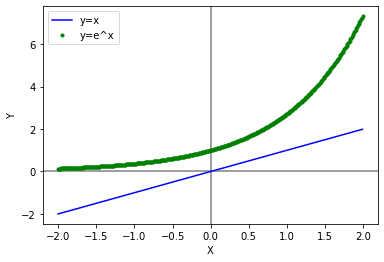

In [13]:
# 그림 5.5 출력 코드
import matplotlib.pyplot as plt
import math
import numpy as np
x = np.arange(-2, 2, 0.01)
e_x = math.e ** x

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, x, 'b-', label='y=x')
plt.plot(x, e_x, 'g.', label='y=e^x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [14]:
# 5.9 와인 데이터셋 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Train on 3897 samples, validate on 1300 samples
Epoch 1/25
3897/3897 [==============================] - 1s 246us/sample - loss: 0.1885 - accuracy: 0.9235 - val_loss: 0.0748 - val_accuracy: 0.9800
Epoch 2/25
3897/3897 [==============================] - 0s 78us/sample - loss: 0.0532 - accuracy: 0.9867 - val_loss: 0.0643 - val_accuracy: 0.9892
Epoch 3/25
3897/3897 [==============================] - 0s 80us/sample - loss: 0.0557 - accuracy: 0.9861 - val_loss: 0.0628 - val_accuracy: 0.9885
Epoch 4/25
3897/3897 [==============================] - 0s 78us/sample - loss: 0.0587 - accuracy: 0.9843 - val_loss: 0.1588 - val_accuracy: 0.9515
Epoch 5/25
3897/3897 [==============================] - 0s 82us/sample - loss: 0.0527 - accuracy: 0.9892 - val_loss: 0.0515 - val_accuracy: 0.9892
Epoch 6/25
3897/3897 [==============================] - 0s 75us/sample - loss: 0.0410 - accuracy: 0.9890 - val_loss: 0.0533 - val_accuracy: 0.9885
Epoch 7/25
3897/3897 [==============================] - 0s 82us/sampl

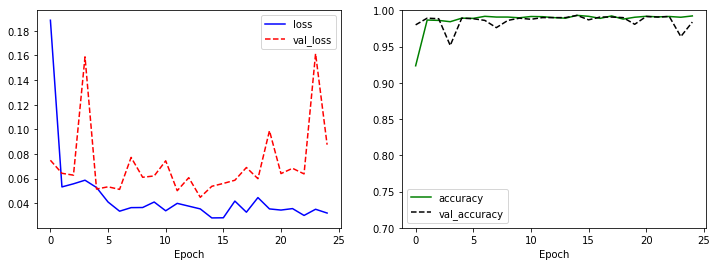

In [15]:
# 5.10 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [16]:
# 5.11 분류 모델 평가
model.evaluate(test_X, test_Y)

1300/1300 [==============================] - 0s 55us/sample - loss: 0.0473 - accuracy: 0.9885


[0.047254195000546485, 0.98846155]

# 5.2 다항 분류 : category의 종류가 3개 이상인 경우..

In [17]:
# 5.12 품질 데이터 확인
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


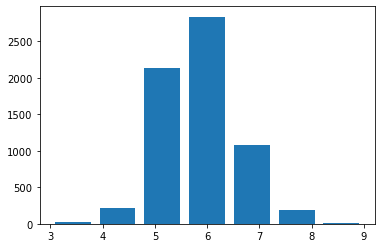

In [18]:
# 5.13 품질 히스토그램 시각화
import matplotlib.pyplot as plt
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

In [19]:
# 5.14 품질을 3개의 범주(좋음, 보통, 나쁨)로 재분류
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [20]:
# 5.15 데이터 정규화 및 train, test 데이터 분리
del wine['quality']
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

In [21]:
# 5.16 와인 데이터셋 다항 분류 모델 생성 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Train on 3897 samples, validate on 1300 samples
Epoch 1/25
3897/3897 [==============================] - 1s 263us/sample - loss: 0.4671 - accuracy: 0.7973 - val_loss: 0.4165 - val_accuracy: 0.8215
Epoch 2/25
3897/3897 [==============================] - 0s 83us/sample - loss: 0.4260 - accuracy: 0.7983 - val_loss: 0.3835 - val_accuracy: 0.8223
Epoch 3/25
3897/3897 [==============================] - 0s 78us/sample - loss: 0.4275 - accuracy: 0.8029 - val_loss: 0.3794 - val_accuracy: 0.8315
Epoch 4/25
3897/3897 [==============================] - 0s 88us/sample - loss: 0.4228 - accuracy: 0.8019 - val_loss: 0.3802 - val_accuracy: 0.8215
Epoch 5/25
3897/3897 [==============================] - 0s 84us/sample - loss: 0.4261 - accuracy: 0.7939 - val_loss: 0.4086 - val_accuracy: 0.8223
Epoch 6/25
3897/3897 [==============================] - 0s 88us/sample - loss: 0.4166 - accuracy: 0.8006 - val_loss: 0.3832 - val_accuracy: 0.8246
Epoch 7/25
3897/3897 [==============================] - 0s 86us/sampl

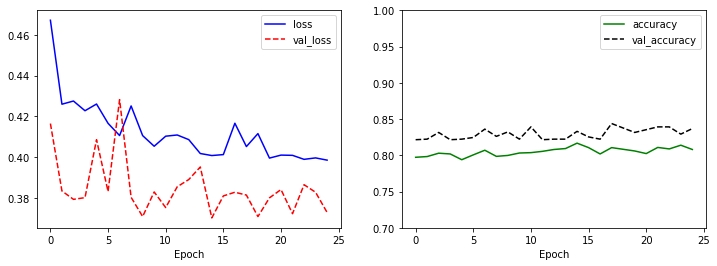

In [22]:
# 5.17 다항 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [23]:
# 5.18 다항 분류 모델 평가
model.evaluate(test_X, test_Y)

1300/1300 [==============================] - 0s 74us/sample - loss: 0.3741 - accuracy: 0.8208


[0.37413587350111743, 0.82076925]

---> 이러한 경우에는 좀 더 향상을 할 수 있는 방법을 고민을 해야한다. 네트워크 구조 변경, 학습률 변경 등...

# 5.3 Fashion MNIST

<img src="img/img_17.png">

<img src="img/img_18.png">

In [24]:
# 5.19 Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

60000 10000


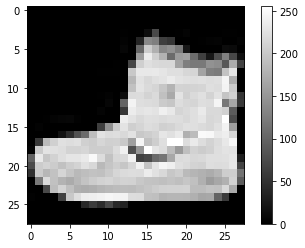

9


In [25]:
# 5.20 데이터 확인
import matplotlib.pyplot as plt
plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [26]:
# 5.21 데이터 정규화
train_X = train_X / 255.0
test_X = test_X / 255.0

print(train_X[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [27]:
# 5.22 Fashion MNIST 분류 모델
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [28]:
# 5.23 Fashion MNIST 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 8s 186us/sample - loss: 0.5239 - accuracy: 0.8161 - val_loss: 0.4352 - val_accuracy: 0.8492
Epoch 2/25
45000/45000 [==============================] - 6s 126us/sample - loss: 0.3907 - accuracy: 0.8599 - val_loss: 0.3809 - val_accuracy: 0.8637
Epoch 3/25
45000/45000 [==============================] - 5s 121us/sample - loss: 0.3500 - accuracy: 0.8734 - val_loss: 0.3476 - val_accuracy: 0.8741
Epoch 4/25
45000/45000 [==============================] - 6s 129us/sample - loss: 0.3255 - accuracy: 0.8805 - val_loss: 0.3366 - val_accuracy: 0.8790
Epoch 5/25
45000/45000 [==============================] - 6s 131us/sample - loss: 0.3050 - accuracy: 0.8886 - val_loss: 0.3470 - val_accuracy: 0.8733
Epoch 6/25
45000/45000 [==============================] - 7s 152us/sample - loss: 0.2895 - accuracy: 0.8931 - val_loss: 0.3334 - val_accuracy: 0.8808
Epoch 7/25
45000/45000 [==========================

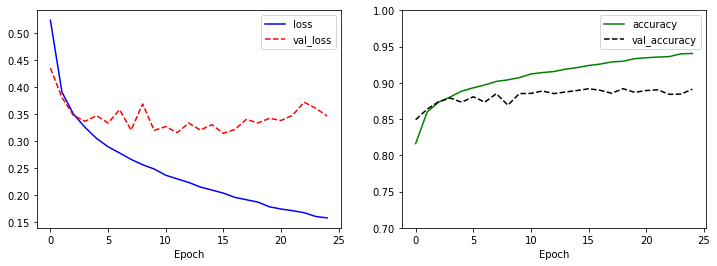

In [29]:
# 5.24 Fashion MNIST 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [30]:
# 5.25 Fashion MNIST 분류 모델 평가
model.evaluate(test_X, test_Y)

10000/10000 [==============================] - 1s 62us/sample - loss: 0.3832 - accuracy: 0.8839s - loss: 0.4001 - accura


[0.38324184205532075, 0.8839]